In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the data
from sklearn.datasets import load_iris

In [15]:
iris = load_iris(as_frame = True)

# as_frame = makes turns the dataset from a dictionary to a datafram


In [16]:
iris['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


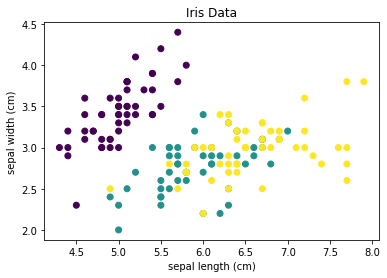

In [21]:
plt.scatter(iris['data']['sepal length (cm)'],
            iris['data']['sepal width (cm)'],
            c = iris['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris Data')
plt.show()

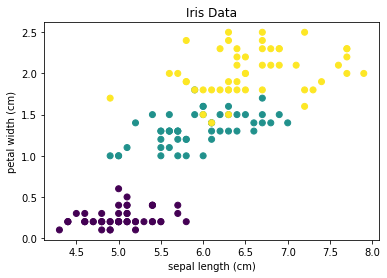

In [23]:
plt.scatter(iris['data']['sepal length (cm)'],
            iris['data']['petal width (cm)'],
            c = iris['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris Data')
plt.show()

In [27]:
iris['target_names'] #targets are numerical labels for the flowers

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
from itertools import combinations

In [32]:
L = list(x for x in combinations(iris['data'].columns, 2))

In [34]:
L

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

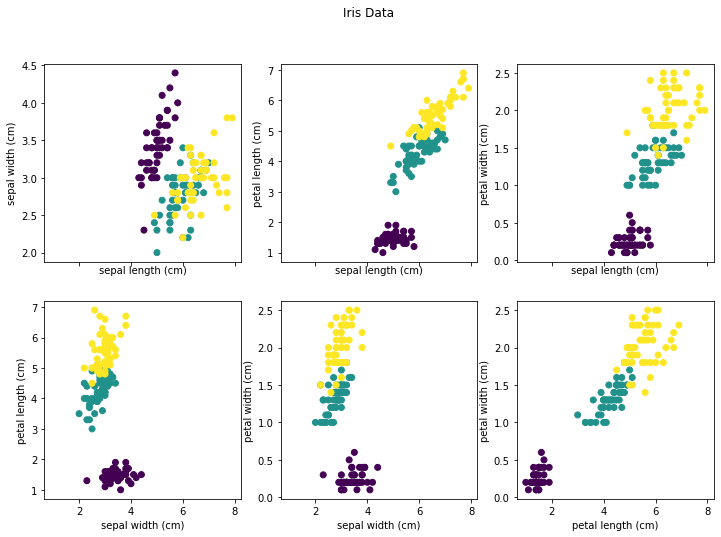

In [43]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3, 
                       sharex = True, 
                       figsize = (12, 8))
#fig is outer plot, ax is inside

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(iris['data'][p[0]],
                           iris['data'][p[1]],
                           c = iris['target'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Iris Data')
plt.show()

    

In [45]:
X = iris['data'][['petal width (cm)',
                 'petal length (cm)']].to_numpy()

y = iris['target'].to_numpy()

In [47]:
X[51]

array([1.5, 4.5])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42)

In [50]:
def distance(p, q):
    return np.sqrt((p-q)@(p-q))

In [54]:
distance(X[10], X[67])

2.7202941017470885

In [64]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels,
                       k):
    neighbors = []
    for i,p in enumerate(training_features):
        d = distance(point,p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x: x[-1])
    
    return neighbors[:k]

In [65]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([1.3, 4.6]), 1, 0.14142135623730995],
 [array([1.4, 4.7]), 1, 0.19999999999999996],
 [array([1.4, 4.7]), 1, 0.19999999999999996],
 [array([1.4, 4.6]), 1, 0.22360679774997916],
 [array([1.2, 4.4]), 1, 0.2999999999999998]]

In [68]:
y_test[-1]

2

In [74]:
def KNN_Predict(point,
                training_features,
                training_labels,
                k,
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                        training_features, 
                        training_labels,
                        k)
    
    if regression == False: 
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    else: 
        return sum([x[1] for x in neighbors])/k

In [78]:
def classification_error(test_features,
                         test_labels,
                         training_features,
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point,
                                               training_features,
                                               training_labels,
                                               k)
    return error/k
    

In [81]:
classification_error(X_test, y_test, X_train, y_train, 7)

0.14285714285714285

In [83]:
possible_k = [x for x in range(3,26,2)]
errors = [classification_error(X_test,
                              y_test,
                              X_train,
                              y_train, k) for k in possible_k]

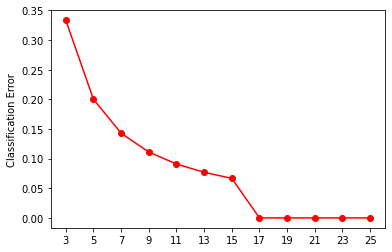

In [84]:
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

In [85]:
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                9) for point in X_test]

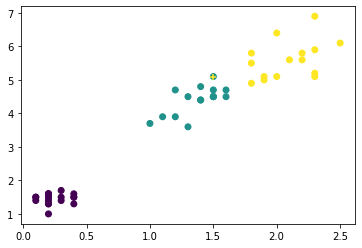

In [89]:
plt.scatter(X_test[:,0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:,0], X_test[:, 1], c = y_test, marker = '+')

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
neigh.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [92]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [93]:
X = X = iris['data'][['petal width (cm)',
                 'petal length (cm)']].to_numpy()
y = iris['data']['sepal length (cm)'].to_numpy()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42)

In [95]:
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                3,
                               regression = True) 
                    for point in X_test]

In [97]:
np.sqrt((y_test-predicted_labels)@(y_test-predicted_labels))

2.977321689781683

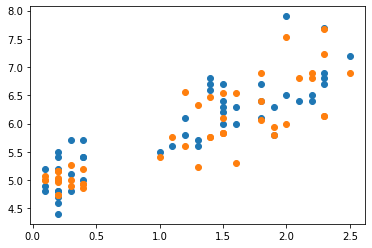

In [101]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predicted_labels)

In [104]:
movies = pd.read_csv('movies_recommendation_data.csv')

In [105]:
movies.columns

Index(['MovieID', 'MovieName', 'IMDBRating', 'Biography', 'Drama', 'Thriller',
       'Comedy', 'Crime', 'Mystery', 'History', 'Label'],
      dtype='object')

In [107]:
X = movies[['IMDBRating', 'Biography', 'Drama', 'Thriller', 
           'Comedy', 'Crime', 'Mystery', 'History']].to_numpy()
y = movies['MovieName'].to_numpy()

In [ ]:
def similar_movies(movie_name. k = 5):
    
#treat each of the movie names as a label - they each have a corresponding vector.
#figure out a way to return the k closest vector names
    
k_nearest_neighbors(point, 
                        training_features, 
                        training_labels,
                       k):